In [320]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [321]:
target = 'SalePrice_Log'

In [322]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score_

In [323]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [324]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### SalePrice 분포, log변환

Skewness: 1.882876
Kurtosis: 6.536282


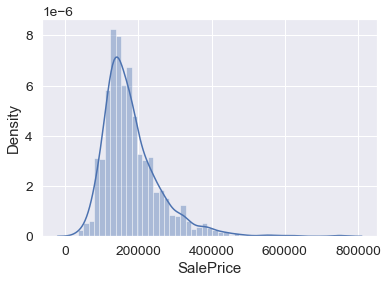

In [325]:
sns.distplot(df_train['SalePrice']);

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


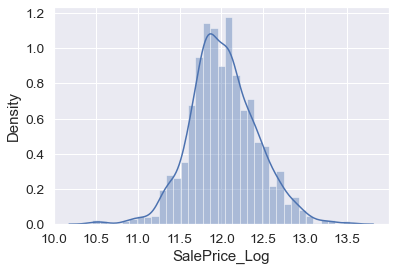

In [326]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

sns.distplot(df_train['SalePrice_Log']);

print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

df_train.drop('SalePrice', axis= 1, inplace=True)

### Numeric / Category 나누기

In [327]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [328]:
total = df_train.isnull().sum().sort_values(ascending=False)
total.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Id', 'Functional',
       'Fireplaces', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath',
       'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageCars', 'GrLivArea',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFullBath',
       'HeatingQC', 'LowQualFinSF', 'LandSlope', 'OverallQual', 'HouseStyle',
       'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig',
       'YearBuilt', 'Utilities', 'LandContour', 'LotShape', 'Street',
       'LotArea', 'MSZoning', 'OverallCond', 'YearRemodAdd', '2ndFlrSF',
       'BsmtFinSF2', '1stF

In [329]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)
    
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [330]:
df_train.isnull().sum().sum()
df_test.isnull().sum().sum()

0

### Numeric Feature - log 변환

In [335]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:.2f}'.format(df_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:.2f}'.format(df_train[col].kurt())  
         )

Id              Skewness: 0.00     Kurtosis: -1.20
MSSubClass      Skewness: 1.41     Kurtosis: 1.58
LotFrontage     Skewness: 2.38     Kurtosis: 21.85
OverallQual     Skewness: 0.22     Kurtosis: 0.10
OverallCond     Skewness: 0.69     Kurtosis: 1.11
YearBuilt       Skewness: -0.61     Kurtosis: -0.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -1.27
MasVnrArea      Skewness: 2.68     Kurtosis: 10.15
BsmtFinSF1      Skewness: 1.69     Kurtosis: 11.12
BsmtFinSF2      Skewness: 4.26     Kurtosis: 20.11
BsmtUnfSF       Skewness: 0.92     Kurtosis: 0.47
TotalBsmtSF     Skewness: 1.52     Kurtosis: 13.25
1stFlrSF        Skewness: 1.38     Kurtosis: 5.75
2ndFlrSF        Skewness: 0.81     Kurtosis: -0.55
LowQualFinSF    Skewness: 9.01     Kurtosis: 83.23
BsmtFullBath    Skewness: 0.60     Kurtosis: -0.84
BsmtHalfBath    Skewness: 4.10     Kurtosis: 16.40
FullBath        Skewness: 0.04     Kurtosis: -0.86
HalfBath        Skewness: 0.68     Kurtosis: -1.08
BedroomAbvGr    Skewness: 0.21    

In [332]:
for df in [df_train, df_test]:
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace= True, axis = 1)
    df['MiscVal_Log'] = np.log(df['MiscVal'])
    df.drop('MiscVal', inplace= True, axis = 1)
    df['PoolArea_Log'] = np.log(df['PoolArea'])
    df.drop('PoolArea', inplace= True, axis = 1)
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index

In [290]:
corr = df_train.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > 0.3].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= 0.3].index)

In [291]:
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)

SalePrice_Log    1.000000
OverallQual      0.817184
GrLivArea_Log    0.730255
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.429531
LotArea_Log      0.399918
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
MiscVal_Log      0.247628
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
MSSubClass       0.073959
PoolArea_Log     0.071015
MoSold           0.057329
3SsnPorch        0.054900
LowQualFinSF     0.037963
YrSold           0.037263
OverallCond      0.036868
Id               0.017942
BsmtHalfBath     0.005149
BsmtFinSF2       0.004832
Name: SalePr

In [292]:
id_test = df_test['Id']

### Category Feature - Correlation

In [293]:
for catg in list(categorical_feats) :
    print(df_train[catg].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
###########################

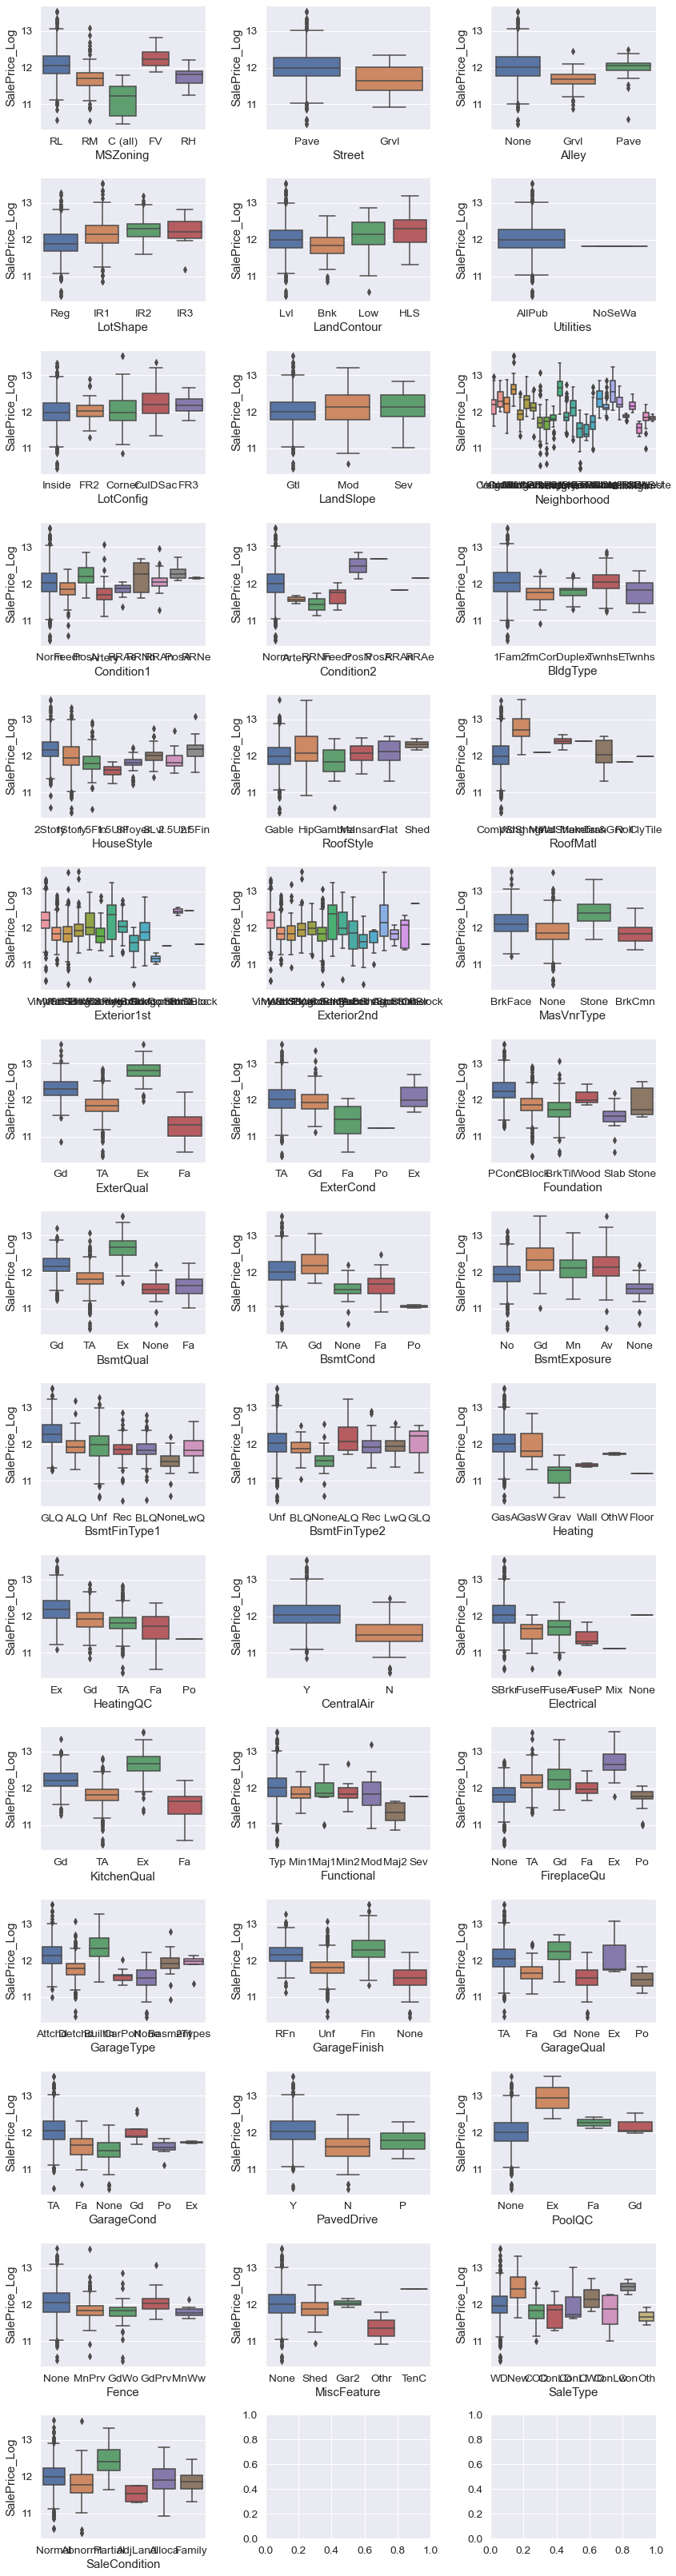

In [294]:
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(list(categorical_feats)):
            sns.boxplot(x=list(categorical_feats)[i], y=target, data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

In [295]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

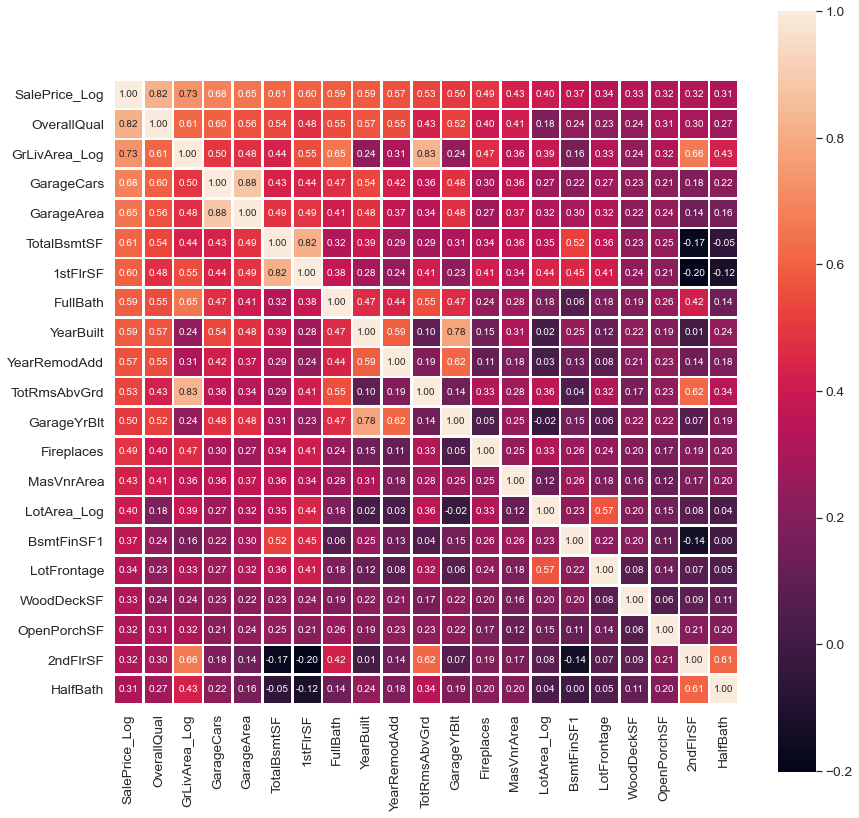

In [296]:
plot_corr_matrix(df_train, len(cols_abv_corr_limit), target)

### 카테고리 피쳐 -> 숫자로 변환

In [297]:
catg_list = catg_strong_corr.copy()
for catg in catg_list :
    g = df_train.groupby(catg)[target].mean()
    print(g)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085885
RM         11.692893
Name: SalePrice_Log, dtype: float64
Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.679727
ClearCr    12.239900
CollgCr    12.163641
Crawfor    12.206659
Edwards    11.712312
Gilbert    12.155803
IDOTRR     11.446889
MeadowV    11.474522
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
NWAmes     12.130609
NoRidge    12.676000
NridgHt    12.619411
OldTown    11.703865
SWISU      11.838435
Sawyer     11.811468
SawyerW    12.090689
Somerst    12.296495
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025895
PosA      12.691580
PosN      12.493879
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.89

In [298]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 

# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [299]:
for df in [df_train, df_test]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  

In [300]:
catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

corr1 = df_train.corr()
corr_abs_1 = corr1.abs()

nr_all_cols = len(df_train)
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, target)[target]

print(ser_corr_1)
cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= 0.3].index)


for df in [df_train, df_test] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace= True, axis = 1)  
    
corr2 = df_train.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df_train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

SalePrice_Log    1.000000
OverallQual      0.817184
GrLivArea_Log    0.730255
NbHd_num         0.696515
GarageCars       0.680625
ExtQ_num         0.678840
KiQ_num          0.667893
BsQ_num          0.659285
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.429531
MSZ_num          0.409405
LotArea_Log      0.399918
BsmtFinSF1       0.372023
CA_num           0.351600
LotFrontage      0.336156
SlTy_num         0.335339
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
Mas_num          0.311369
Elc_num          0.304862
MiscVal_Log      0.247628
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
Cond2_num        0.105442
MSSubClass  

In [301]:
corr = df_train.corr()
corr_abs = corr.abs()

nr_all_cols = len(df_train)
print (corr_abs.nlargest(nr_all_cols, target)[target])

SalePrice_Log    1.000000
OverallQual      0.817184
GrLivArea_Log    0.730255
NbHd_num         0.696515
GarageCars       0.680625
ExtQ_num         0.678840
KiQ_num          0.667893
BsQ_num          0.659285
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.429531
MSZ_num          0.409405
LotArea_Log      0.399918
BsmtFinSF1       0.372023
CA_num           0.351600
LotFrontage      0.336156
SlTy_num         0.335339
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
Mas_num          0.311369
Elc_num          0.304862
Name: SalePrice_Log, dtype: float64


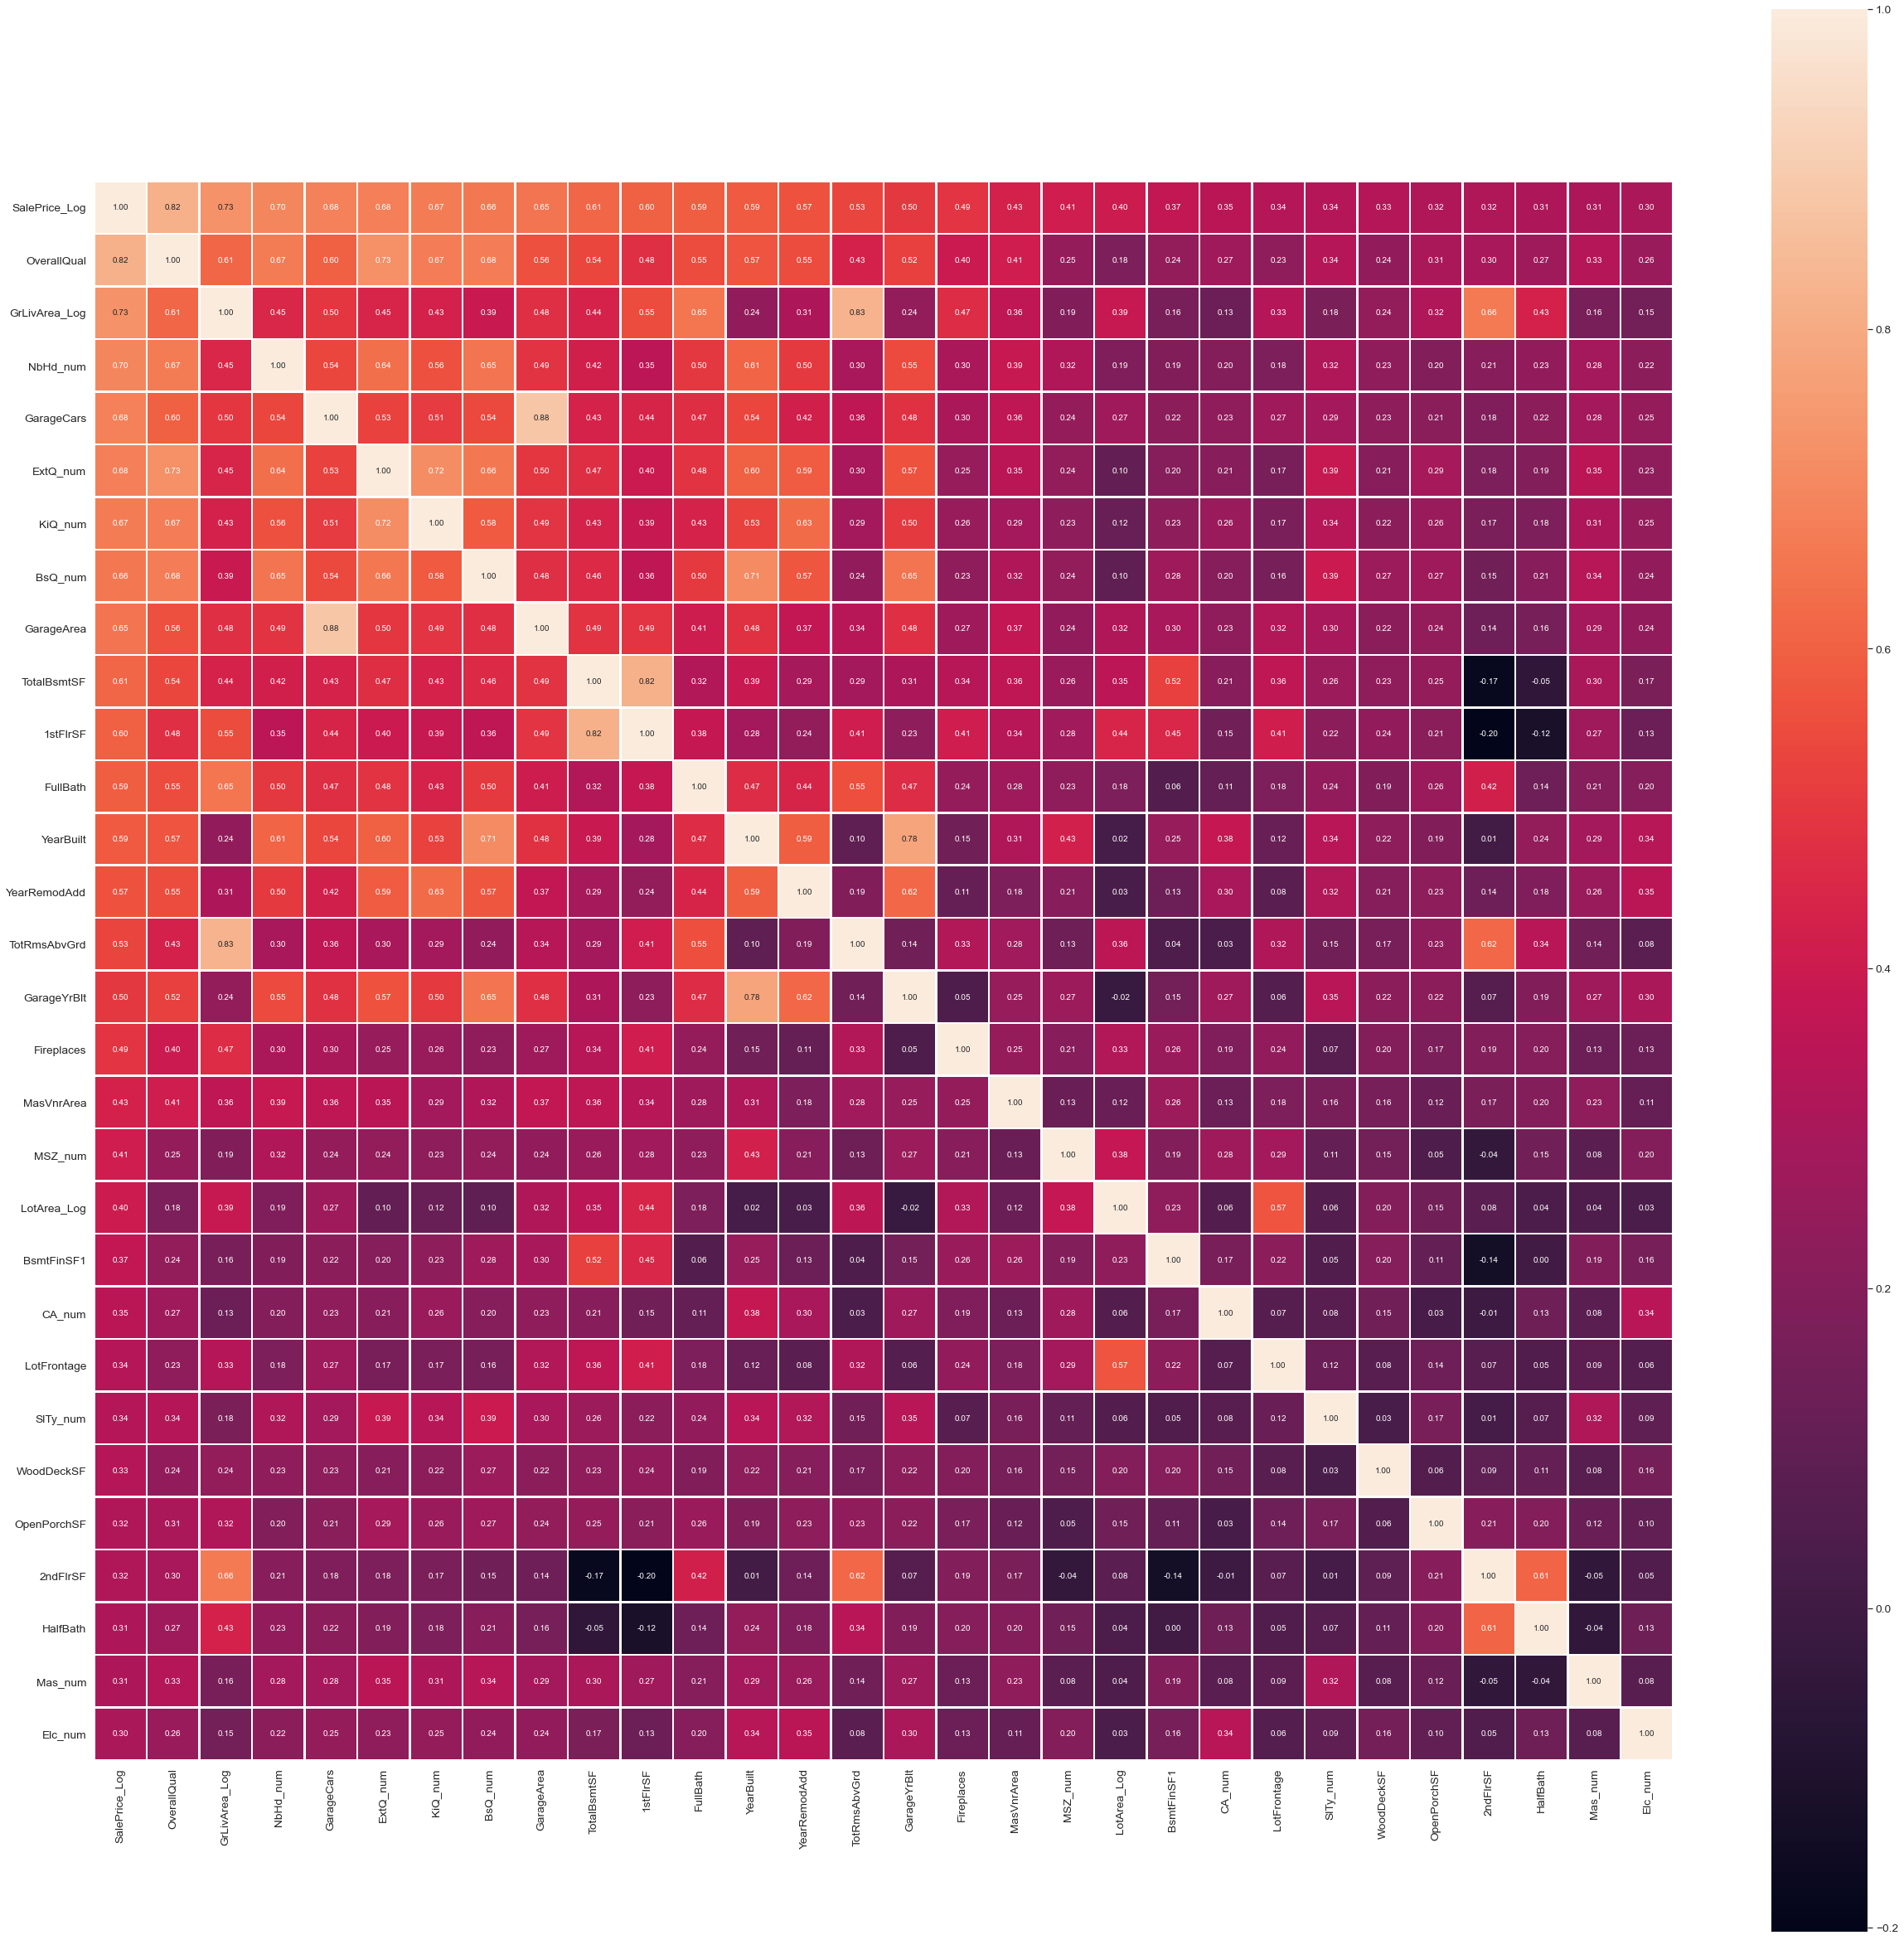

In [302]:
nr_feats=len(df_train.columns)
plot_corr_matrix(df_train, nr_feats, target)

### Multicollinearity 제거

In [303]:
cols = corr_abs.nlargest(nr_all_cols, target)[target].index
cols = list(cols)

if drop_similar == 1 :
    for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
        if col in cols: 
            cols.remove(col)

### 최종 Feature

In [304]:
print(list(cols))

['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'NbHd_num', 'GarageCars', 'ExtQ_num', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log', 'BsmtFinSF1', 'CA_num', 'LotFrontage', 'SlTy_num', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'Mas_num', 'Elc_num']


In [305]:
feats = cols.copy()
feats.remove('SalePrice_Log')

print(feats)

['OverallQual', 'GrLivArea_Log', 'NbHd_num', 'GarageCars', 'ExtQ_num', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log', 'BsmtFinSF1', 'CA_num', 'LotFrontage', 'SlTy_num', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'Mas_num', 'Elc_num']


In [306]:
df_train_ml = df_train[feats].copy()
df_test_ml  = df_test[feats].copy()

y = df_train[target]

### Scaling

In [307]:
sc = StandardScaler()
df_train_ml_sc = sc.fit_transform(df_train_ml)
df_test_ml_sc = sc.transform(df_test_ml)

In [308]:
df_train_ml_sc = pd.DataFrame(df_train_ml_sc)
df_train_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.651479,0.529260,0.660250,0.311725,1.052302,0.735994,0.643519,-0.459303,0.789741,1.050994,...,0.575425,0.263813,-0.229372,-0.303663,-0.752176,0.216503,1.161852,1.227585,-0.309994,0.307332
1,-0.071836,-0.381846,0.660250,0.311725,-0.689604,-0.771091,0.643519,0.466465,0.789741,0.156734,...,1.171992,0.263813,0.451936,-0.303663,1.626195,-0.704483,-0.795163,-0.761621,-0.309994,0.307332
2,0.651479,0.659675,0.660250,0.311725,1.052302,0.735994,0.643519,-0.313369,0.789741,0.984752,...,0.092907,0.263813,-0.093110,-0.303663,-0.752176,-0.070361,1.189351,1.227585,-0.309994,0.307332
3,0.651479,0.541511,0.660250,1.650307,-0.689604,0.735994,-0.922377,-0.687324,-1.026041,-1.863632,...,-0.499274,0.263813,-0.456474,-0.303663,-0.752176,-0.176048,0.937276,-0.761621,-0.309994,0.307332
4,1.374795,1.282191,2.164095,1.650307,1.052302,0.735994,0.643519,0.199680,0.789741,0.951632,...,0.463568,0.263813,0.633618,-0.303663,0.780197,0.563760,1.617877,1.227585,-0.309994,0.307332


In [309]:
X = df_train_ml.copy()
y = df_train[target]
X_test = df_test_ml.copy()

X_sc = df_train_ml_sc.copy()
y_sc = df_train[target]
X_test_sc = df_test_ml_sc.copy()

X.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea_Log  1460 non-null   float64
 2   NbHd_num       1460 non-null   int64  
 3   GarageCars     1460 non-null   int64  
 4   ExtQ_num       1460 non-null   int64  
 5   KiQ_num        1460 non-null   int64  
 6   BsQ_num        1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   FullBath       1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  Fireplaces     1460 non-null   int64  
 12  MasVnrArea     1460 non-null   float64
 13  MSZ_num        1460 non-null   int64  
 14  LotArea_Log    1460 non-null   float64
 15  BsmtFinSF1     1460 non-null   int64  
 16  CA_num         1460 non-null   int64  
 17  LotFrontage    1460 non-null   float64
 18  SlTy_num

### Regression

In [310]:
score_calc = 'neg_mean_squared_error'

In [311]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [312]:
lr = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(lr, parameters, cv=5, verbose=1, scoring = score_calc)
grid_linear.fit(X, y)

sc_linear = get_best_score(grid_linear)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.14621700056938558
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)


In [313]:
grid_linear_sc = GridSearchCV(lr, parameters, cv=5, verbose=1 , scoring = score_calc)
grid_linear_sc.fit(X_sc, y)

sc_linear_sc = get_best_score(grid_linear_sc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.14621700056938547
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)


In [314]:
lr.fit(X, y)
pred_linreg_all = lr.predict(X_test)
pred_linreg_all[pred_linreg_all < 0] = pred_linreg_all.mean()

In [315]:
sub_linreg = pd.DataFrame()
sub_linreg['Id'] = id_test
sub_linreg['SalePrice'] = pred_linreg_all
sub_linreg['SalePrice'] = np.exp(sub_linreg['SalePrice']) 
print(sub_linreg)

        Id      SalePrice
0     1461  104747.313678
1     1462  159454.357066
2     1463  185740.046689
3     1464  195514.621277
4     1465  205776.084000
...    ...            ...
1454  2915   83968.916154
1455  2916   90749.740100
1456  2917  162115.169308
1457  2918  118390.584085
1458  2919  218343.632289

[1459 rows x 2 columns]


In [316]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=5, verbose=1, scoring = score_calc)
grid_ridge.fit(X, y)

sc_ridge = get_best_score(grid_ridge)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.14612534279163483
{'alpha': 0.01, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.01, normalize=True, tol=1e-06)


In [317]:
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge_sc = GridSearchCV(ridge, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_ridge_sc.fit(X_sc, y)

sc_ridge_sc = get_best_score(grid_ridge_sc)

ridge.fit(X, y)
pred_ridge_all = ridge.predict(X_test)
pred_ridge_all[pred_ridge_all < 0] = pred_ridge_all.mean()

sub_ridge = pd.DataFrame()
sub_ridge['Id'] = id_test
sub_ridge['SalePrice'] = pred_ridge_all
sub_ridge['SalePrice'] = np.exp(sub_ridge['SalePrice']) 
print(sub_ridge)
sub_ridge.to_csv('ridge2.csv',index=False)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.14612534279163478
{'alpha': 0.01, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.01, normalize=True, tol=1e-06)
        Id      SalePrice
0     1461  104921.471704
1     1462  159400.592059
2     1463  185830.882883
3     1464  195790.816082
4     1465  205744.365799
...    ...            ...
1454  2915   83900.193856
1455  2916   90704.905926
1456  2917  162324.288486
1457  2918  118320.010305
1458  2919  218535.172741

[1459 rows x 2 columns]


In [338]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=5, verbose=1, scoring = score_calc)
grid_lasso.fit(X, y)

sc_lasso = get_best_score(grid_lasso)

pred_lasso = grid_lasso.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.1468608923273705
{'alpha': 0.001, 'normalize': False, 'tol': 1e-05}
Lasso(alpha=0.001, tol=1e-05)


NameError: name 'best_score_' is not defined

In [337]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel

gpr = GaussianProcessRegressor(random_state=5, alpha=5e-9, 
                                n_restarts_optimizer=0, 
                               optimizer='fmin_l_bfgs_b', 
                               copy_X_train=True)

param_grid = {'normalize_y' : [True,False],
              'kernel' : [DotProduct(), ConstantKernel(1.0, (1e-3, 1e3))] }

grid_gpr = GridSearchCV(gpr, param_grid, cv=5, verbose=1, scoring = score_calc)
grid_gpr.fit(X_sc, y_sc)

sc_gpr = get_best_score(grid_gpr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.1462166597390342
{'kernel': DotProduct(sigma_0=1), 'normalize_y': False}
GaussianProcessRegressor(alpha=5e-09, kernel=DotProduct(sigma_0=1),
                         random_state=5)


NameError: name 'best_score_' is not defined

In [ ]:
#https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner/output?select=gpr.csv